#**Step 01: Clone the YOLOv9 Github Repo**

In [1]:
!git clone https://github.com/WongKinYiu/yolov9.git

Cloning into 'yolov9'...



#**Step 02: Change Current Directory**

In [1]:
%cd /teamspace/studios/this_studio/ObjectDetection/Test1/yolov9

/teamspace/studios/this_studio/ObjectDetection/Test1/yolov9


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


#**Step 03: Install All the Required Packages**

In [2]:
!pip install -r requirements.txt -q


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


#**Step 04: Download the Model Weights**

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/teamspace/studios/this_studio/ObjectDetection/Test1/yolov9


In [4]:
!mkdir -p {HOME}/weights

In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt

In [6]:
!ls -la {HOME}/weights

total 475348
drwxr-xr-x 1 ec23433 ec23433      4096 Aug 16 22:38 .
drwxr-xr-x 1 ec23433 ec23433      4096 Aug 16 21:46 ..
-rwxr--r-- 1 ec23433 ec23433 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 ec23433 ec23433 103153312 Feb 18 12:36 yolov9-c.pt.1
-rwxr--r-- 1 ec23433 ec23433 140217688 Feb 18 12:36 yolov9-e.pt
-rw-r--r-- 1 ec23433 ec23433 140217688 Feb 18 12:36 yolov9-e.pt.1


#**Step 05: Download the Dataset from Roboflow**

In [9]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
project = rf.workspace("roboflow-universe-projects").project("construction-site-safety")
version = project.version(30)
dataset = version.download("yolov9")


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Construction-Site-Safety-30 in yolov9:: 100%|██████████| 1446/1446 [00:00<00:00, 6113.34it/s]


#**Step 06: Train Custom Model**

In [10]:
%cd /teamspace/studios/this_studio/ObjectDetection/Test1/yolov9

/teamspace/studios/this_studio/ObjectDetection/Test1/yolov9


using dhist requires you to install the `pickleshare` library.


In [15]:
!python train_dual.py --workers 8 --device 0 --batch 8 --data 'Construction-Site-Safety-30/data.yaml' --img 640 --cfg models/detect/yolov9-e.yaml --weights '{HOME}/weights/yolov9-e.pt' --name yolov9-e-finetuning --hyp hyp.scratch-high.yaml --min-items 0 --epochs 60 --close-mosaic 15 


2024-08-11 17:33:20.177032: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-11 17:33:20.193234: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-11 17:33:20.193270: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-11 17:33:20.203871: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-11 17:33:20.909337: W tensorflow/compiler/tf

#**Download Weights From the Drive**

In [16]:
pip install gdown



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


##**Step 07: Examine Training Results**

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [19]:
!ls /teamspace/studios/this_studio/ObjectDetection/Test1/yolov9/runs/train/yolov9-e-finetuning2/

F1_curve.png						results.png
PR_curve.png						train_batch0.jpg
P_curve.png						train_batch1.jpg
R_curve.png						train_batch2.jpg
confusion_matrix.png					val_batch0_labels.jpg
events.out.tfevents.1723397601.ip-10-192-12-19.37494.0	val_batch0_pred.jpg
hyp.yaml						val_batch1_labels.jpg
labels.jpg						val_batch1_pred.jpg
labels_correlogram.jpg					val_batch2_labels.jpg
opt.yaml						val_batch2_pred.jpg
results.csv						weights


In [20]:
from IPython.display import Image

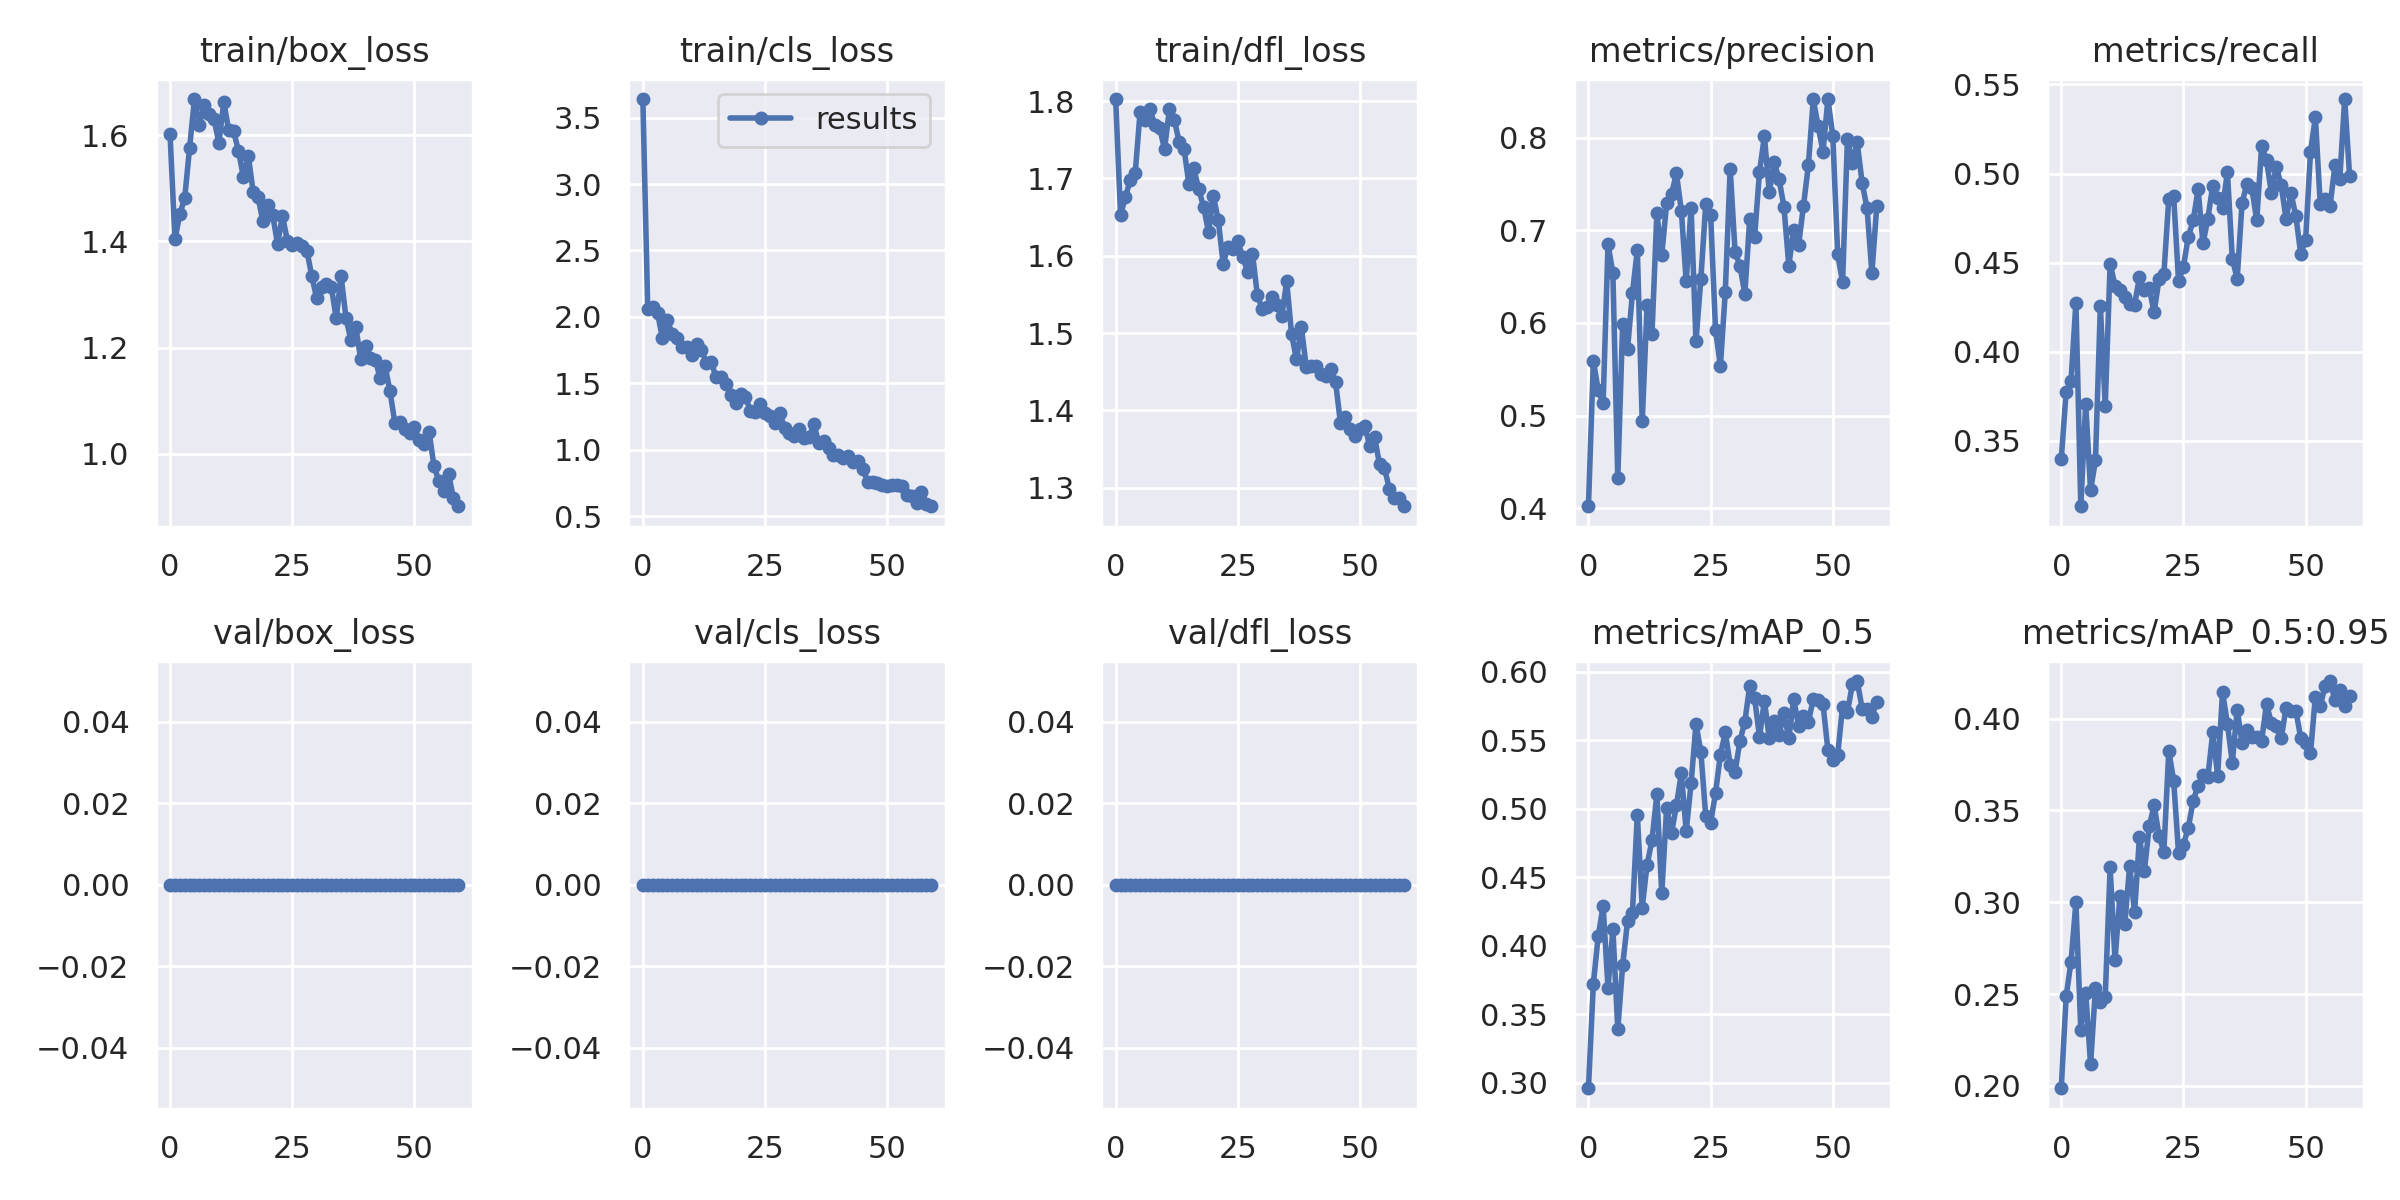

In [24]:
from IPython.display import Image

Image(filename=f"/teamspace/studios/this_studio/ObjectDetection/Test1/yolov9/runs/train/yolov9-e-finetuning2/results.png", width=1000)


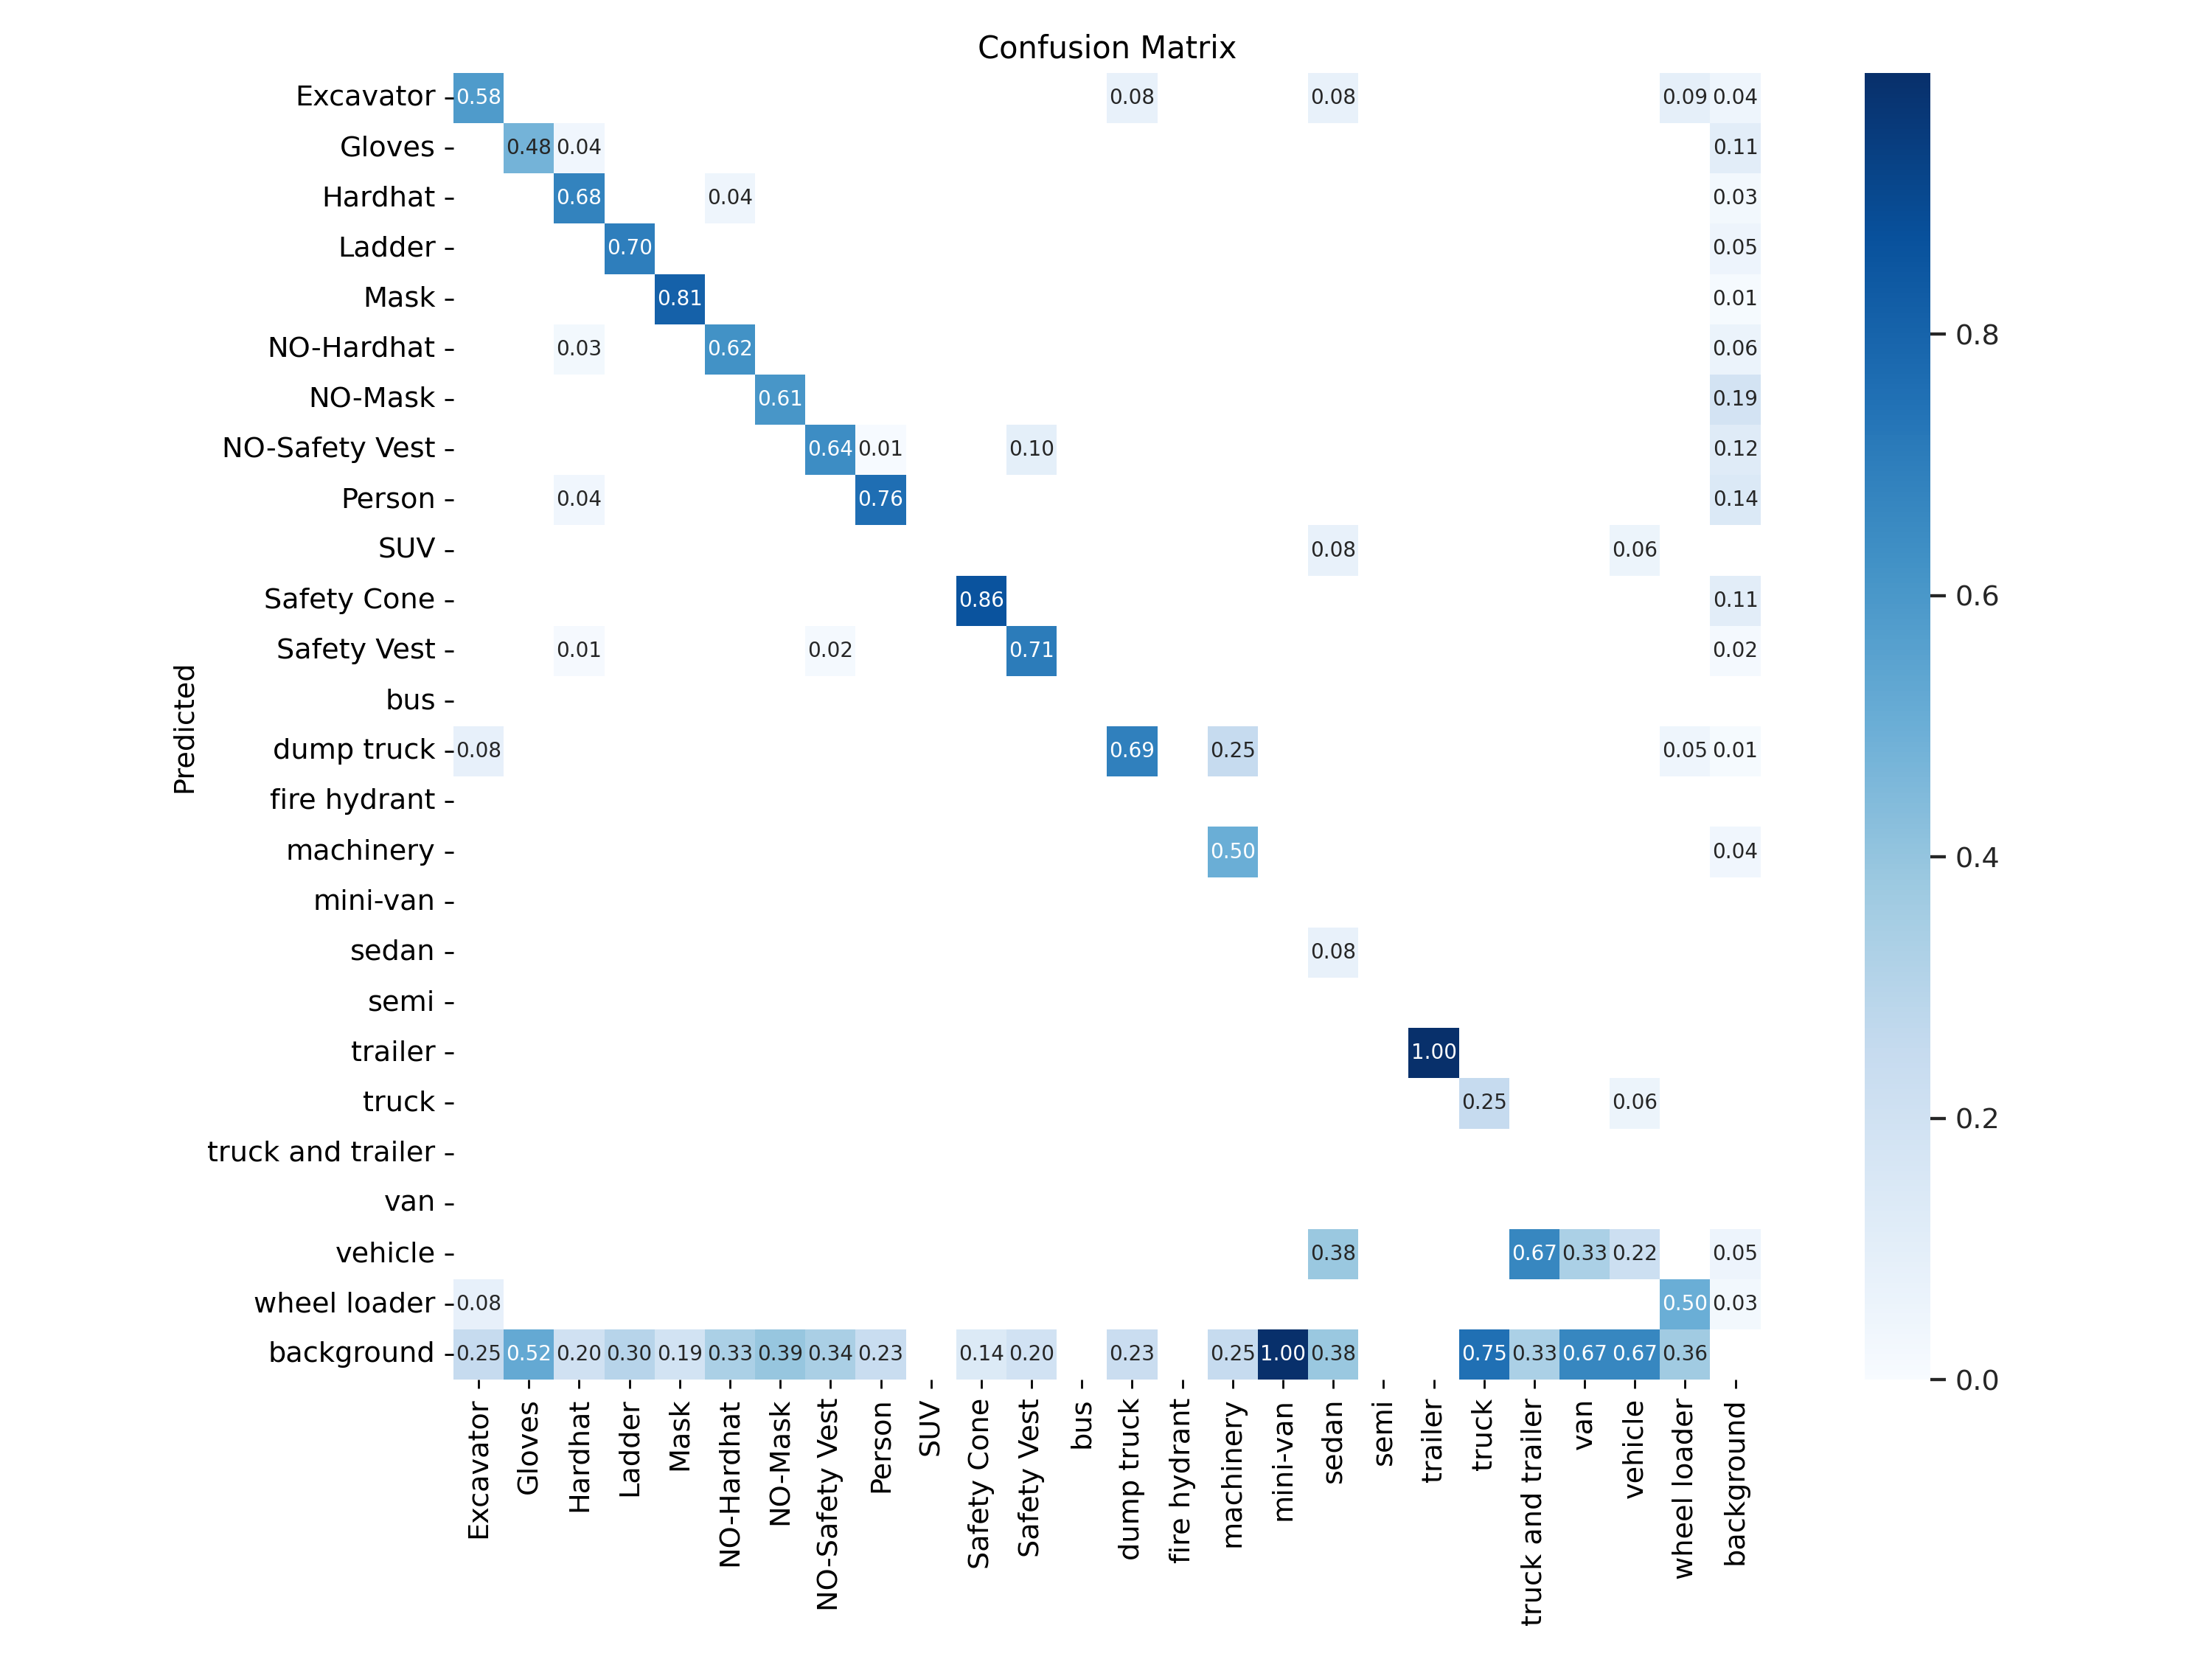

In [30]:
from IPython.display import Image

Image(filename="/teamspace/studios/this_studio/ObjectDetection/Test1/yolov9/runs/train/yolov9-e-finetuning2/confusion_matrix.png", width=1000)


#**Step 08: Validate Custom Model**

In [31]:
# evaluate yolov9 models
!python val_dual.py --data 'Construction-Site-Safety-30/data.yaml' --img 640 --batch 16 --conf 0.001 --iou 0.7 --device 0 --weights 'runs/train/yolov9-e-finetuning2/weights/best.pt' --save-json --name yolov9_ppe_c_640_val


val_dual: data=Construction-Site-Safety-30/data.yaml, weights=['runs/train/yolov9-e-finetuning2/weights/best.pt'], batch_size=16, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=yolov9_ppe_c_640_val, exist_ok=False, half=False, dnn=False, min_items=0
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68584822 parameters, 0 gradients, 240.9 GFLOPs
val: Scanning /teamspace/studios/this_studio/ObjectDetection/Test1/yolov9/Constr
                 Class     Images  Instances          P          R      mAP50   
                   all        114        733      0.792      0.481      0.593      0.421
             Excavator        114         12      0.624      0.583      0.667      0.614
                Gloves        114         25   

#**Step 09: Download the Demo Videos**

In [ ]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /content/yolov9/PPE_Part1.mp4
100% 14.2M/14.2M [00:00<00:00, 184MB/s]


In [ ]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /content/yolov9/PPE_Part2.mp4
100% 11.1M/11.1M [00:00<00:00, 125MB/s]


#**Step 10: Inference on Image**

In [32]:
# inference yolov9 models
!python detect_dual.py --source 'Construction-Site-Safety-30/valid/images/-1969-_png_jpg.rf.c383b0a9a12f96b66d8089f4b4cb8b5c.jpg' --img 640 --device 0 --weights 'best.pt' --name yolov9_ppe_c_640_val


detect_dual: weights=['best.pt'], source=Construction-Site-Safety-30/valid/images/-1969-_png_jpg.rf.c383b0a9a12f96b66d8089f4b4cb8b5c.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_ppe_c_640_val, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.10 torch-2.2.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
image 1/1 /teamspace/studios/this_studio/ObjectDetection/Test1/yolov9/Construction-Site-Safety-30/valid/images/-1969-_png_jpg.rf.c383b0a9a12f96b66d8089f4b4cb8b5c.jpg: 640x640 1 Protective Helmet, 23.4ms
Speed: 0.3ms pre-process, 23.4ms inference, 279.6ms NMS per ima

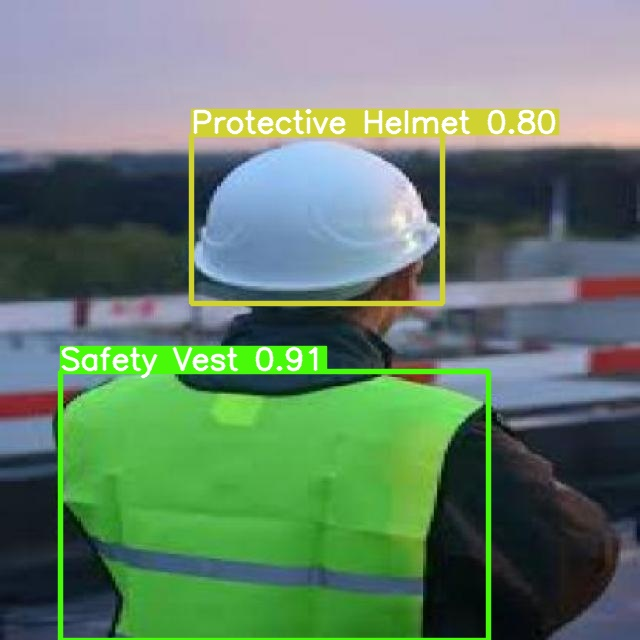

In [ ]:
Image(filename=f"{HOME}/runs/detect/yolov9_c_ppe_640_detect/85_jpg.rf.bb831a912c797ce2a13ad85fe9e6094e.jpg")

#**Step 11: Inference on Video**

#**Display the Output Video**

In [ ]:
# inference yolov9 models
!python detect_dual.py --source 'PPE_Part2.mp4' --img 640 --device 0 --weights 'best.pt' --name yolov9_ppe_640_detect2


detect_dual: weights=['best.pt'], source=PPE_Part2.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolov9_ppe_640_detect2, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-76-g519346b Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-e summary: 839 layers, 68557066 parameters, 0 gradients, 240.7 GFLOPs
video 1/1 (1/267) /content/yolov9/PPE_Part2.mp4: 384x640 (no detections), 155.4ms
video 1/1 (2/267) /content/yolov9/PPE_Part2.mp4: 384x640 1 Protective Helmet, 2 Safety Vests, 55.9ms
video 1/1 (3/267) /content/yolov9/PPE_Part2.mp4: 384x640 1 Protective Helmet, 2 Safety Vests, 55.6ms
video 1/1 (4/267) /content/yolov9/PPE_Part2.mp4: 384x640 2 Safet